In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras import (
    layers,
    models,
    callbacks,
    losses,
    utils,
    metrics,
    optimizers,
    datasets,
)
import tensorflow.keras.backend as K
from model import VAE

In [10]:
INPUT_SHAPE = (256,64,1)
CONV_FILTERS = (512, 256, 128, 64, 32)
N_CHANNELS = INPUT_SHAPE[2]
BATCH_SIZE = 128
LATENT_DIM = 200
BETA = 20000
LEARNING_RATE = 0.0005
EPOCHS = 5
VALIDATION_SPLIT = 0.2

In [2]:
vae = VAE(input_shape = (256,128,1),
        conv_filters = (512, 256, 128, 64, 32),
        latent_dim= 128,
        )

In [3]:
def load_spectrograms(spectrogram_dir):
    spectrograms = []
    file_names = []
    for file in os.listdir(spectrogram_dir):
        file_path = os.path.join(spectrogram_dir, file)
        spect = np.load(file_path)
        spectrograms.append(spect)
        file_names.append(file)

    spectrograms = np.array(spectrograms) #(num bins, num layers)
    #only 2 dimensions - no number of channels, need to reshape to add the extra dimension
    #the ... means keeping the existing axis of the array unchangedm np,newaxis adds new dimension with size of 1
    spectrograms = spectrograms[..., np.newaxis] # shape should now be (number of samples, number of bins, number of frames, 1), treating the spectrograms as greyscale images
    return spectrograms, file_names

SPECTROGRAM_DIR = r"C:\Users\Jayde\Desktop\library\bird_songs\data\bird_songs\spectrograms"
train_data, file_names = load_spectrograms(SPECTROGRAM_DIR)
#train_data = tf.data.Dataset.from_tensor_slices(spectrograms)
#train_data = train_data.batch(batch_size = 32, drop_remainder=True)
print("got train data")

got train data


In [4]:

vae.load_weights("./models/vae")
#tmp = vae.predict(train_data.take(1))
vae.decoder.load_weights("./models/decoder")
vae.encoder.load_weights("./models/encoder")

In [15]:
%tensorboard --./logs logs/gradient_tape

UsageError: Line magic function `%tensorboard` not found.


In [6]:
# Select a subset of the test set
num_to_predict= 6
example_images = np.array(
    list(train_data[:num_to_predict])
)

1/1 [==============================] - 5s 5s/step


Text(0.5, 0.48, 'Reconstructions')

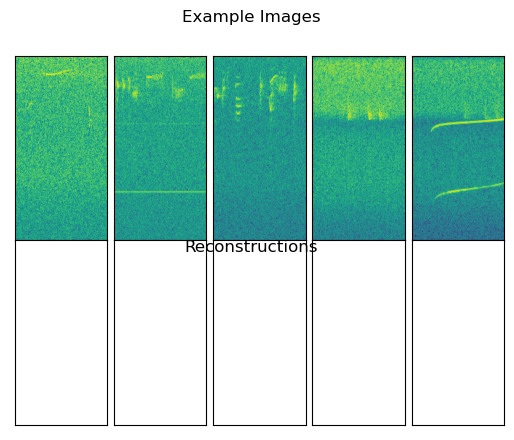

In [7]:
z_mean, z_log_var, reconstructions = vae.predict(example_images)
num_to_show = 5
fig, axs = plt.subplots(2,num_to_show)

plt.subplots_adjust(wspace=0, hspace=0)
for i in range(num_to_show):
    axs[0,i].imshow(example_images[i])
    axs[1,i].imshow(reconstructions[i])

    # Remove x and y ticks and labels for each subplot
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])
    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])
    axs[0, i].set_xticklabels([])
    axs[0, i].set_yticklabels([])
    axs[1, i].set_xticklabels([])
    axs[1, i].set_yticklabels([])

fig.text(0.5, 0.96, "Example Images", ha='center', va='center', fontsize=12)
fig.text(0.5, 0.48, "Reconstructions", ha='center', va='center', fontsize=12)

1/1 [==============================] - 1s 1s/step


c:\Users\Jayde\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6607: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
c:\Users\Jayde\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6608: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

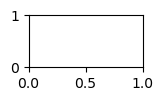

In [8]:
_, _, z = vae.encoder.predict(example_images)

x = np.linspace(-3, 3, 100)

fig = plt.figure(figsize=(20, 5))
fig.subplots_adjust(hspace=0.6, wspace=0.4)

for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1)
    ax.hist(z[:, i], density=True, bins=20)
    ax.axis("off")
    ax.text(
        0.5, -0.35, str(i), fontsize=10, ha="center", transform=ax.transAxes
    )
    ax.plot(x, norm.pdf(x))

plt.show()

In [14]:
history = vae.history
metrics = history.history.keys()
print(metrics)
for metric in ['total_loss','reconstruction_loss']:
    print(metric)
    plt.plot(np.linspace(1, EPOCHS, EPOCHS),history.history[metric], label = metric)

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

dict_keys([])
total_loss


KeyError: 'total_loss'